In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
backgr = pd.read_csv('user_data_mse.csv')
scores = pd.read_csv('cs236user.csv', sep='\t', lineterminator='\n')

Index([u'user_id', u'cond', u'training', u'smse'], dtype='object')
[2 1 4]
['b' 'a' 'c']
(2, 'b')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


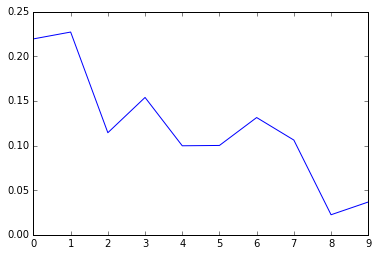

(2, 'a')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


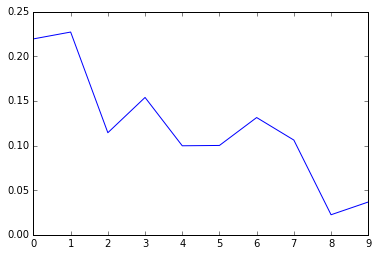

(2, 'c')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


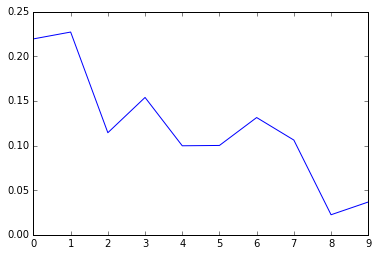

(1, 'b')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


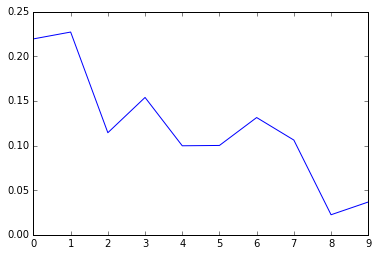

(1, 'a')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


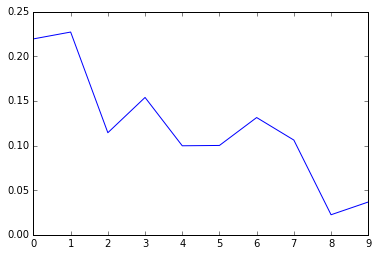

(1, 'c')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


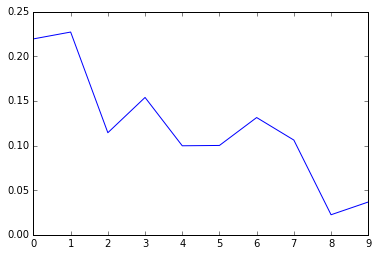

(4, 'b')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


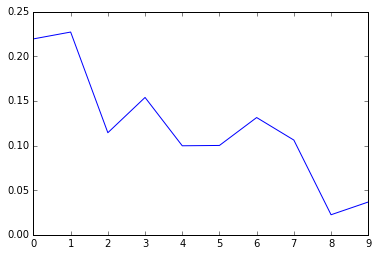

(4, 'a')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


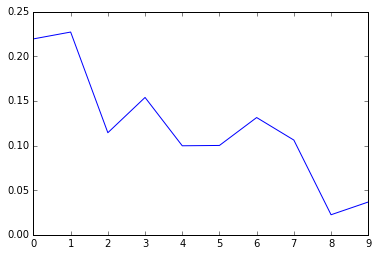

(4, 'c')
[ 0.21943132  0.2270935   0.11434056  0.153844    0.09971229  0.10007967
  0.13133856  0.1061054   0.02245923  0.03671754]


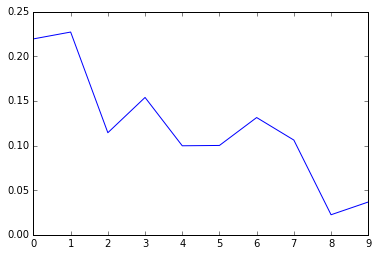

In [7]:

#for i in backgr.columns:
#    print(i)

print(scores.columns)

backgr = backgr[['userid', 'raven_score_yr123', "raven_adjusted_score"]]

conds = scores.cond.unique()
trains = scores.training.unique()

#scores.user_id = np.array(scores.user_id, dtype=int)

print(conds)
print(trains)

#print(scores.head)
#print(backgr.head)
#print(backgr.raven_score_yr123, backgr.raven_adjusted_score)
merged = pd.merge(scores, backgr, left_on=['user_id'], right_on=['userid'], how='inner')


#sprint(merged.head)
for cond in conds:
    for train in trains:
        print(cond, train)
        cond_list = (merged['cond'] == cond)
        train_list = (merged['training'] == train)
        condition = train_list | 1 # & cond_list & 
        mse = merged[condition].smse
        raven_score = merged[condition].raven_score_yr123.values
        raven_adjust = merged[condition].raven_adjusted_score.values
        raven = raven_adjust
        slots = 10
        avg_mse = np.zeros(slots)
        for i in range(slots):
            avg_mse[i] = np.mean(mse[(raven >= i*1.0/slots) & (raven < (i+1.0)/slots)])
        
        print avg_mse
        plt.figure(np.random.randint(100))
        plt.plot(np.arange(len(avg_mse)),avg_mse) 
        plt.show()
#         plt.close('All')
        

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [9]:
X = merged[['cond', 'training', 'raven_adjusted_score']]
y = merged[['smse']]
X[['cond']] = X[['cond']].astype(str)
X = pd.get_dummies(X)
X = X.fillna(X.mean())
X = X.as_matrix()
print X

[[ 0.75        0.          1.         ...,  0.          1.          0.        ]
 [ 0.66666667  1.          0.         ...,  1.          0.          0.        ]
 [ 0.58333333  0.          1.         ...,  1.          0.          0.        ]
 ..., 
 [ 0.83333333  0.          0.         ...,  0.          1.          0.        ]
 [ 0.66666667  1.          0.         ...,  0.          1.          0.        ]
 [ 0.66666667  0.          0.         ...,  0.          0.          1.        ]]


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [10]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
print train_X.shape,test_X.shape,train_y.shape
print 'baseline'
print 'training err',np.mean((np.mean(train_y)-train_y)**2)**0.5
print 'testing err',np.mean((np.mean(train_y)-test_y)**2)**0.5
model = LinearRegression(fit_intercept = True)
model.fit(train_X,train_y)
print mean_squared_error(train_y,model.predict(train_X))
print mean_squared_error(test_y,model.predict(test_X))

(1457, 7) (486, 7) (1457, 1)
baseline
training err smse    0.391785
dtype: float64
testing err smse    0.396231
dtype: float64
0.145112815372
0.146696365587


In [11]:
X = merged[['cond', 'training', 'raven_adjusted_score']]
y = merged[['smse']]
X[['cond']] = pd.factorize(X['cond'])[0]
X[['training']] = pd.factorize(X['training'])[0]
X = X.fillna(X.mean())
X = X.as_matrix()
y = y.as_matrix()
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
print train_X.shape,test_X.shape,train_y.shape

(1457, 3) (486, 3) (1457, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [12]:
train_r = np.zeros(2)
test_r = np.zeros(2)
feature_set = set(np.arange(2))
train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
print train_err,test_err
for i,s in enumerate(feature_set):
    feature_set.remove(s)
    train_err1,test_err1=lr(feature_set,train_X,train_y,test_X,test_y)
    train_r[i] = train_err1-train_err
    test_r[i] = test_err1-test_err
    feature_set.add(s)
print train_r
plt.scatter(np.arange(2),train_r,label='Training')
plt.scatter(np.arange(2),test_r,label = 'Testing',c = 'red')
plt.xticks(np.arange(2),np.arange(2))
plt.title('Diminish Return')
plt.legend()
plt.show()

NameError: name 'lr' is not defined

In [13]:
# fit linear regression with given features 
def lr(features,train_X,train_y,test_X,test_y):
    features = np.array(list(features))
    n_feature =len(features)
    model = LinearRegression(fit_intercept=True)
    if n_feature==0: 
        train_X = train_X[:,-1].reshape(-1,1)
        test_X = test_X[:,-1].reshape(-1,1)
        model.fit(train_X,train_y)
        print model.coef_,model.intercept_
        
        return mean_squared_error(model.predict(train_X),train_y),mean_squared_error(model.predict(test_X),test_y)

    train_err = 0.0
    test_err = 0.0
    train_vector =np.sum(train_X[:,features]* np.array([3**i for i in range(n_feature)]),axis=1)
    test_vector =np.sum(test_X[:,features]* np.array([3**i for i in range(n_feature)]),axis=1)
    train_X = train_X[:,-1].reshape(-1,1)
    test_X = test_X[:,-1].reshape(-1,1)
    for v in range(3**n_feature):
        train_idx = np.where(train_vector==v)[0]
        test_idx = np.where(test_vector==v)[0]
        model.fit(train_X[train_idx],train_y[train_idx])
        print model.coef_,model.intercept_
        train_err += np.sum((model.predict(train_X[train_idx])-train_y[train_idx])**2)
        if len(test_idx)!=0:
            test_err += np.sum((model.predict(test_X[test_idx])-test_y[test_idx])**2)
    return train_err/len(train_y),test_err/len(test_y)
# print lr(set(np.arange(2)),train_X,train_y,test_X,test_y)

[[-0.23682429]] [ 0.16437727]
[[-0.3279501]] [ 0.38548947]
[[-0.03129349]] [-0.073604]
[[-0.27543337]] [ 0.31407985]
[[-0.56557024]] [ 0.59437252]
[[-0.06848945]] [ 0.12807185]
[[-0.30147456]] [ 0.25988775]
[[-0.20499842]] [ 0.2496256]
[[-0.113733]] [ 0.06651361]
set([0, 1]) 0.143329864604 0.148375209759
[[-0.23149026]] [ 0.18655201]
[[-0.3193047]] [ 0.35892382]
[[-0.17533108]] [ 0.16831371]
set([1]) 0.148887471224 0.1519527689
[[-0.25232945]] [ 0.23345367]
[[-0.39168666]] [ 0.43118805]
[[-0.08667323]] [ 0.05251243]
set([0]) 0.146448426392 0.148463963978
[[-0.2383809]] [ 0.23637628]
set([]) 0.151216031355 0.153830891995
[ 0.00311856  0.0047676   0.        ] [ 1.  0.  0.]


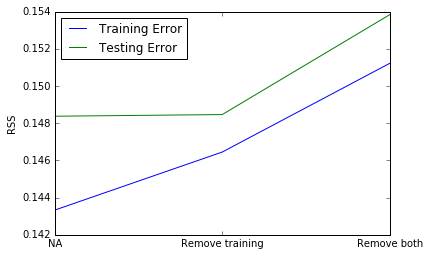

In [15]:
train_r = np.zeros(3)
test_r = np.zeros(3)
r = np.zeros(3)
feature_set = set(np.arange(2))
train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
print feature_set,train_err,test_err
train_r[0] = train_err
test_r[0] = test_err
removed = np.zeros(3)
for i in range(2):
    dr = 100
    f = 0
    for s in feature_set:
        feature_set.remove(s)
        train_err,test_err=lr(feature_set,train_X,train_y,test_X,test_y)
        print feature_set,train_err,test_err
        if train_err-train_r[i]<dr: 
            dr = train_err-train_r[i]
            train_r[i+1] = train_err
            test_r[i+1] = test_err
            f = s;
        feature_set.add(s)
    r[i] = train_r[i+1]-train_r[i]
    feature_set.remove(f)
    removed[i]=f
print r,removed
plt.plot(np.arange(3),train_r,label='Training Error')
plt.plot(np.arange(3),test_r,label = 'Testing Error')
plt.xticks(np.arange(3),['NA','Remove training','Remove both'])
plt.ylabel('RSS')
plt.legend(loc='best')
plt.show()

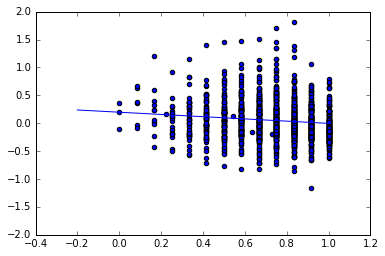

In [18]:
plt.scatter(train_X[:,-1],train_y)
plt.plot(np.linspace(-0.2,1,100),-0.24*np.linspace(0,1,100)+0.237)
plt.ylim(ymin=-2,ymax=2)
plt.show()